In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ensuring plots are displayed inline in Jupyter notebooks
%matplotlib inline

In [3]:
# Load the dataset
dataset = pd.read_csv('Wholesale customers data.csv')
print(dataset.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [4]:
# Preparing the dataset
X = dataset.drop('Channel', axis=1)
y = dataset['Channel']
y[y == 2] = 0
y[y == 1] = 1

In [5]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# Preprocessing: Scaling the input data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)  # Use transform instead of fit_transform for the test set


In [9]:
# Creating and training the XGBoost model
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', max_depth=4, alpha=10, learning_rate=1.0, n_estimators=100)
xgb.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [10]:
# Making predictions
y_pred = xgb.predict(X_test)

In [11]:
# Evaluating the model: Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('XGBoost model accuracy score: {0:0.4f}'.format(accuracy))

XGBoost model accuracy score: 0.8788


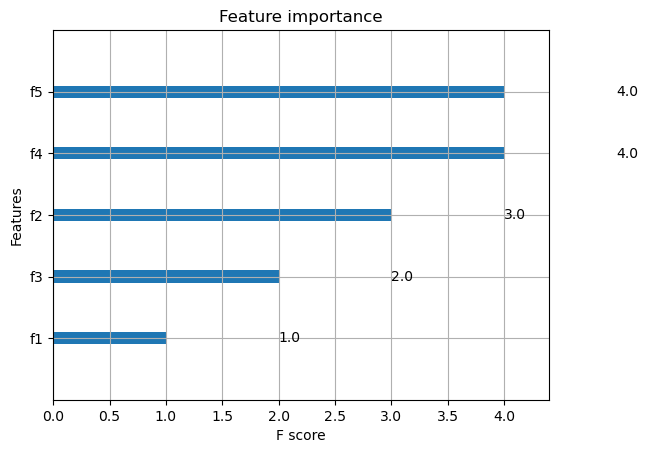

In [13]:
# Plotting feature importance
from xgboost import plot_importance
plot_importance(xgb)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()